In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/apprentissageNoSupervise/Data.csv'

In [ ]:
data = pd.read_csv(path)
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
class KMeans():
  def __init__(self, K, epsilon):
    self.K= K
    self.epsilon= epsilon
  
  def initialize(self, X):

    """Initilize K random Centroids
    """
    indices = [] 
    lines = random.sample(range(0, X.shape[0]-1), self.K)
    centroids = np.array(X.iloc[lines,:])
    return centroids

  def EuclideanDistance(self, x1, x2):
    #The sum of the squared differences of the elements
    dist = []
    distances = 0
    for i in range(len(x1)): # pour chaque centroides
      distances = np.sum(np.power(x1[i] - x2, 2))
      distances = pow(distances, (1/2))
      dist.append(distances)
    return dist.copy()


  def Classify(self, centroids, X):
    #Classify item to the cluster with minimum distance 
    Assignments=[]
    ### initialize matrice distance of zeros with shape (len(centroids),len(X))
    distance= np.zeros((len(centroids), len(X)))
    for i in range(len(X)): # pour chaque ligne de X
      distance[:,i] = self.EuclideanDistance(centroids, X.values[i, :])
      sort_indice = np.argsort(distance[:,i])
      Assignments.append(sort_indice[0]) 
    return np.array(Assignments)

  def update_centroids(self, Assignments, X,old_centroids):
    #Calculate the new means
    data= X.copy()
    data['centroids'] = Assignments
    ## initialize centroid with zeros
    new_centroids= np.zeros((self.K,X.shape[1]))
    for i in range(self.K):
      members = data[data['centroids'] ==i]
      members = members.iloc[:, 0:(members.shape[1]-1)] 
      if members.shape[0]  > 0 :
            new_centroids[i] = np.average(members.values , axis=0)
      else :
             new_centroids[i] = old_centroids[i].copy()  
    return new_centroids

  def fit(self, X):
    #Fit the K-Means algorithm untill no changes happens or changes < epsilon
    ### initialize centroids
    centroids= self.initialize(X)
    max_iter=1000
    for i in range(max_iter):
      old_centroids = centroids.copy()
      assignments = self.Classify(centroids, X)
      centroids = self.update_centroids(assignments, X, old_centroids)
      if (np.all(np.abs(centroids-old_centroids)<self.epsilon)):
        break
    return assignments,centroids

In [ ]:
steve = KMeans(2, 0.00001)
steve.fit(data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
        [6.30103093, 2.88659794, 4.95876289, 1.69587629]]))

In [ ]:
import matplotlib.pyplot as plt

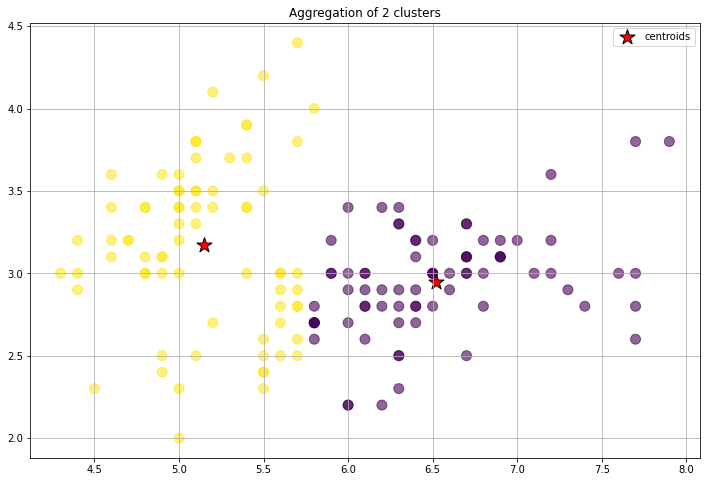

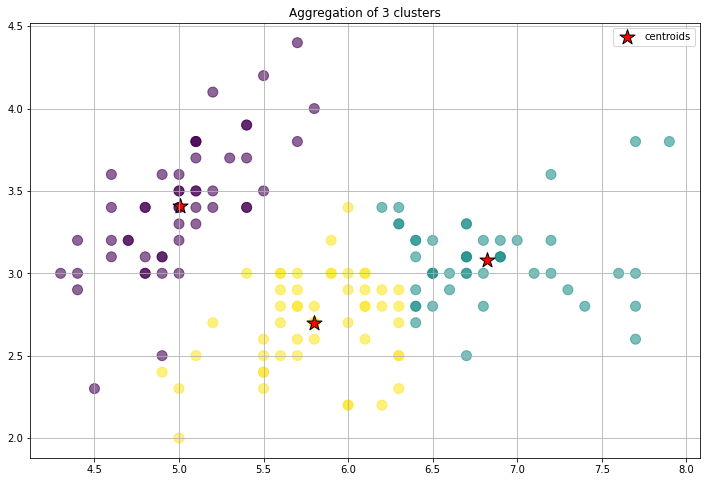

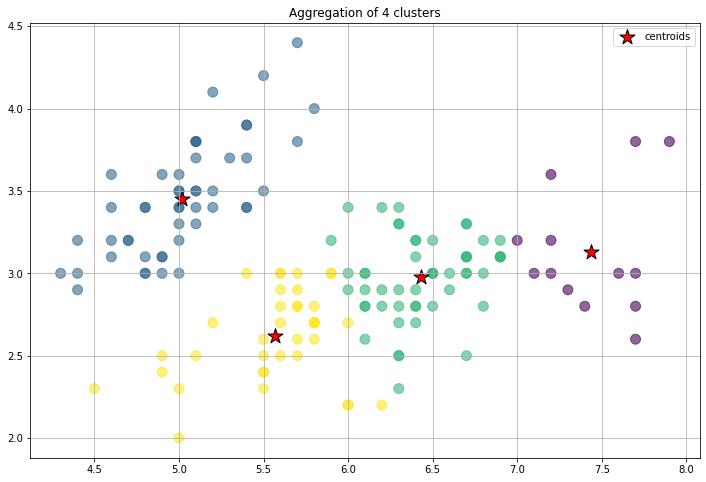

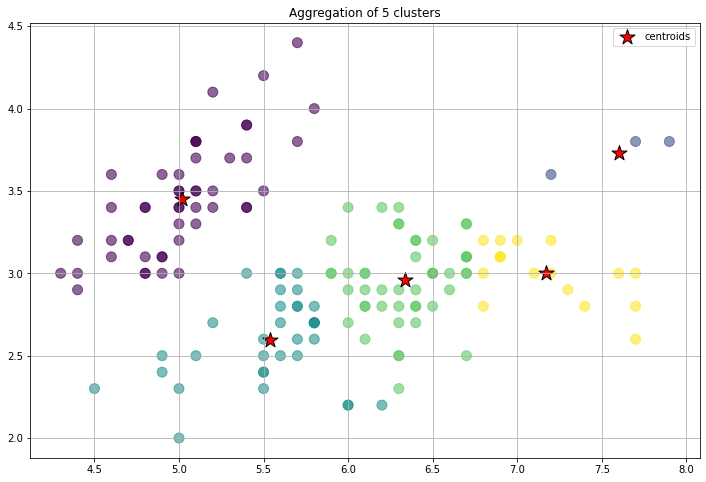

In [ ]:
for k in range(2,6):
  km = KMeans(k,0.0001)
  assignments ,centroids= km.fit(data.iloc[:, [0,1]])
  data['cluster'] = assignments
  plt.figure(figsize=(12,8))
  plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.cluster,alpha = 0.6,s=100)
  plt.scatter(centroids[:, 0], centroids[:, 1],
                 s=250, marker='*',
                  c='red', edgecolor='black',
                  label='centroids'
              )
  plt.legend()
  plt.title('Aggregation of {} clusters'.format(k))
  plt.grid()